In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv(r"data\amazon_cleand_data\Amazon_Review_clean_with_Category.csv")
df.head()

,Product_Category,Review_Header,Review_Text,Rating
0,smartTv,Nice one,I liked it,5
1,mobile,Huge battery life with amazing display,I bought the phone on Amazon and been using my...,5
2,books,Four Stars,"Awesome book at reasonable price, must buy ......",4
3,smartTv,Nice quality,good,5
4,books,Nice book,"The book is fine,not bad,contains nice concept...",3


In [38]:
cross = pd.crosstab(df.Product_Category, df.Rating, rownames = ["Product_Category"], colnames = ["Rating"], normalize= "index")
cross

Rating,1,2,3,4,5
Product_Category,,,,,
books,0.036592,0.016377,0.048362,0.172467,0.726203
mobile,0.117106,0.036544,0.076297,0.213896,0.556157
mobile accessories,0.125456,0.039028,0.083120,0.235652,0.516745
refrigerator,0.097199,0.025293,0.057065,0.208612,0.611831
smartTv,0.126600,0.035106,0.063984,0.201328,0.572983


In [39]:
cross_2 = pd.crosstab(df.Product_Category, df.Rating, rownames = ["Product_Category"], colnames = ["Rating"])
cross_2

Rating,1,2,3,4,5
Product_Category,,,,,
books,143,64,189,674,2838
mobile,2663,831,1735,4864,12647
mobile accessories,1858,578,1231,3490,7653
refrigerator,465,121,273,998,2927
smartTv,1850,513,935,2942,8373


# statistical chi2 test to see if the two categorical varialbles Product_Category and Rating depent on eachother
H0 Hypothesis: The Rating is independent from the Product Category

In [40]:
from scipy.stats import chi2_contingency
result = chi2_contingency(cross_2)
print("The p_value of the chi_2 test is: ", result[1])

The p_value of the chi_2 test is:  4.8328739131733316e-148


 The p_value is ver high --> thus the Null Hypothesis is rejected, there is anno influence of the Product category on the Rating

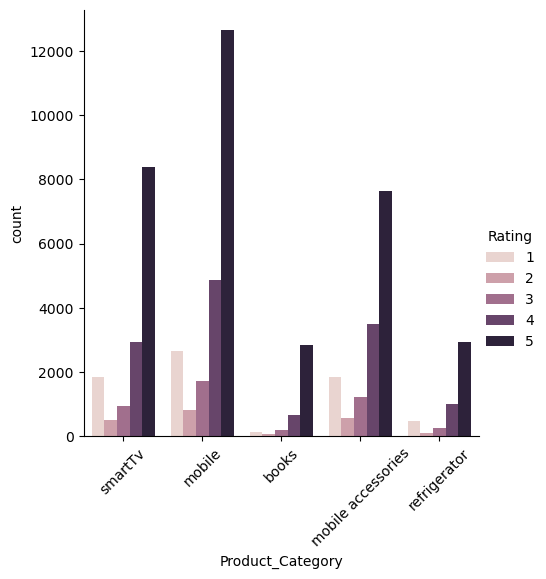

In [43]:
# countplot on the product category
sns.catplot(x = "Product_Category", hue = "Rating", kind = "count", data = df)
plt.xticks(rotation = 45);

In [18]:
# testing the influence of review length on hte category 
df["len_review"] = df["Review_Text"].apply(lambda x: len(x.split()))

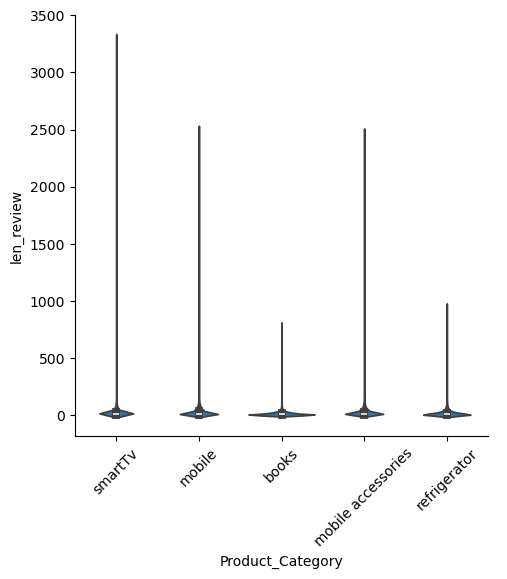

In [29]:
sns.catplot(x = "Product_Category", y = "len_review", kind = "violin", data = df)
plt.xticks(rotation = 45);

In [ ]:
# an ANOVA test is performed to veryfy this 
# H0: there is no significant effect of the Product_category on the Product Category

In [36]:
df_num=df.replace({'mobile': 1, "mobile accessories": 2, "smartTv": 3, "refrigerator": 4, "books": 5})

C:\Users\Admin\AppData\Local\Temp\ipykernel_11428\2558851021.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_num=df.replace({'mobile': 1, "mobile accessories": 2, "smartTv": 3, "refrigerator": 4, "books": 5})


Product_Category
mobile                22740
mobile accessories    14810
smartTv               14613
refrigerator           4784
books                  3908
Name: count, dtype: int64

In [37]:
from scipy import stats
import statsmodels.api
x= statsmodels.formula.api.ols("Product_Category ~ len_review", data = df_num).fit()
result = statsmodels.api.stats.anova_lm(x)
print(result)

                 df        sum_sq     mean_sq           F        PR(>F)
len_review      1.0    378.521095  378.521095  260.465757  1.797289e-58
Residual    60853.0  88434.443000    1.453247         NaN           NaN


In [ ]:
# H0 can be rejected: there is a significant effect of the Product_category on the len_review